In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict

import networkx as nx
import nxviz as nxv
import community


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install nxviz

     |████████████████████████████████| 2.3MB 6.8MB/s 
     |████████████████████████████████| 1.8MB 20.2MB/s 
     |████████████████████████████████| 266kB 35.8MB/s 
     |████████████████████████████████| 225kB 50.1MB/s 
     |████████████████████████████████| 215kB 59.9MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 10.5MB 50.4MB/s 
     |████████████████████████████████| 20.4MB 183kB/s 
     |████████████████████████████████| 276kB 55.6MB/s 
     |████████████████████████████████| 583kB 55.9MB/s 
     |████████████████████████████████| 13.1MB 44.7MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 112kB 59.9MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=25bed0857acc838e3871aca76f07e5c21717b1c9461afbe74c71868767b27171
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
  Created

In [0]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
cd gameofthrones-master/data/

/content/drive/My Drive/gameofthrones-master/data


In [0]:
def make_graph(nodes_df, edges_df):
    g = nx.Graph()

    for i,row in nodes.iterrows():
        keys = row.index.tolist()
        values = row.values
        # The dict contains all attributes
        g.add_node(row[0], **dict(zip(keys,values)))

    for i,row in edges.iterrows():
        keys = row.index.tolist()
        values = row.values
        g.add_edge(row[0], row[1],
                   **dict(zip(keys,values)))
    
    return g

# g = nx.read_edgelist('got-s7-edges.csv',create_using=nx.Graph(),nodetype=str)
# # print nx.info(g, n=none)
# nx.draw(g)
# plt.show()

In [0]:
nodes = pd.read_csv('got-s7-nodes.csv', index_col=1)
edges = pd.read_csv('got-s7-edges.csv')
g = make_graph(nodes, edges)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


['AEGON', 'AERYS', 'ALYS', 'ARYA', 'BALERION', 'BENJEN', 'BERIC', 'BRAN', 'BRIENNE', 'BRONN', 'CATELYN', 'CERSEI', 'DAENERYS', 'DAVOS', 'DICKON', 'EDDISON_TOLLETT', 'DROGO', 'ELLARIA', 'EURON', 'GENDRY', 'GILLY', 'GREY_WORM', 'HARRAG', 'HIGH_SEPTON', 'HOT_PIE', 'HOUND', 'HOWLAND', 'JAIME', 'JEOR', 'JOANNA', 'JOFFREY', 'JON', 'JON_ARRYN', 'JORAH', 'LITTLE_SAM', 'LITTLEFINGER', 'LYANNA', 'LYANNA_MORMONT', 'LYSA', 'MARGAERY', 'MARWYN', 'MEERA', 'MELISANDRE', 'MISSANDEI', 'MOUNTAIN', 'MYRCELLA', 'NED', 'NED_UMBER', 'NIGHT_KING', 'NYMERIA', 'OBARA', 'OBERYN', 'OLENNA', 'PODRICK', 'QHONO', 'QYBURN', 'RAMSAY', 'RANDYLL', 'RHAEGAR', 'ROBB', 'ROBERT', 'ROBETT', 'SAM', 'SANSA', 'SHIREEN', 'STANNIS', 'THEON', 'THOROS', 'TOMMEN', 'TORMUND', 'TYCHO', 'TYENE', 'TYRION', 'TYWIN', 'VARYS', 'VISERYS', 'WALDER', 'WHITE_WALKER', 'MAESTER_WOLKAN', 'YARA', 'YOHN_ROYCE']
[('AEGON', 'DAENERYS'), ('AERYS', 'DAENERYS'), ('AERYS', 'CERSEI'), ('AERYS', 'JON'), ('AERYS', 'TYRION'), ('AERYS', 'VARYS'), ('AERYS', '

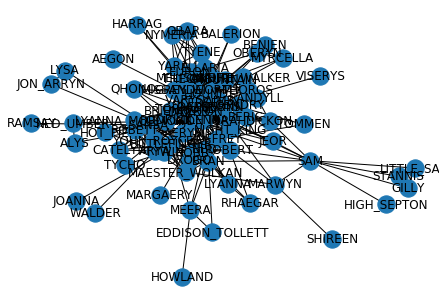

In [0]:
nx.draw(g, with_labels=True, edge_color='black')
print(g.nodes)
print(g.edges)

Node link diagram :
The nodes are shown as a jumbled mess with too much overlap.

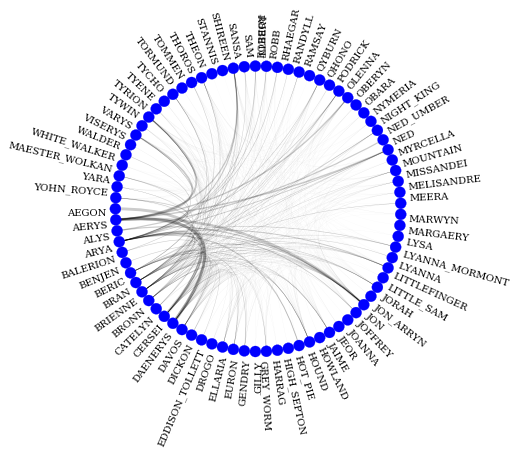

In [0]:
c = nxv.CircosPlot(g,
                   edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
  ) 
c.draw()

Circos plot which is much easier to read.


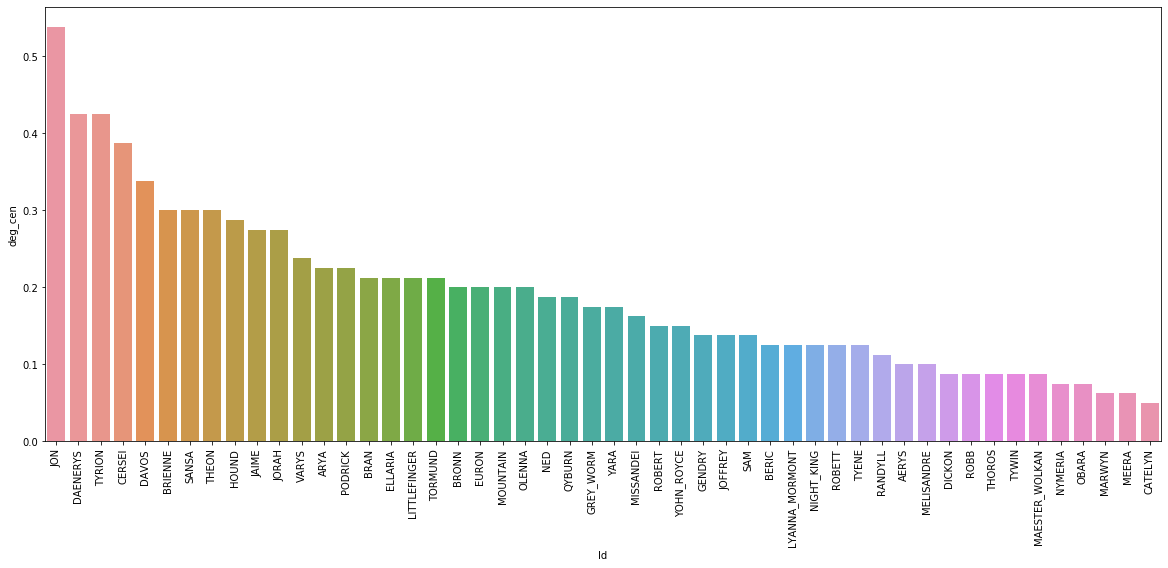

In [0]:
deg_cen = nx.degree_centrality(g)
nodes['deg_cen'] = nodes['Id'].apply(lambda x: deg_cen[x])
g = make_graph(nodes, edges)

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=nodes.nlargest(50, 'deg_cen'), 
            x='Id', y='deg_cen', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Determining the most important character using the degree centrality of the nodes.

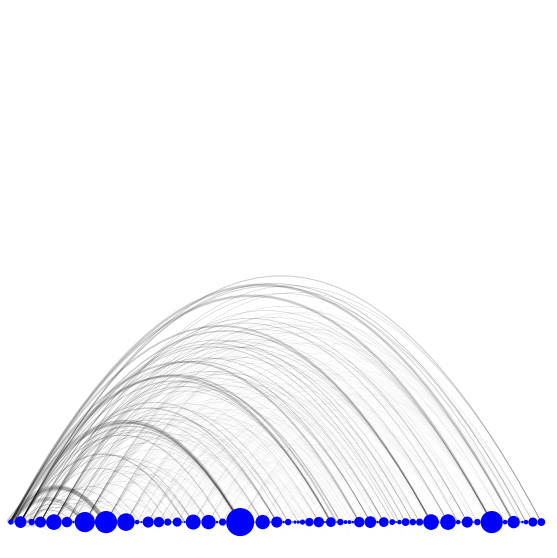

In [0]:
a = nxv.ArcPlot(g,  
                node_size=[10*g.nodes[n]['deg_cen'] for n in g.nodes], 
                edge_width=(edges['Weight'] / edges['Weight'].quantile(.95)).tolist(),
                figsize=(10,10))
a.draw()

Arc plot to visualize degree centrality.

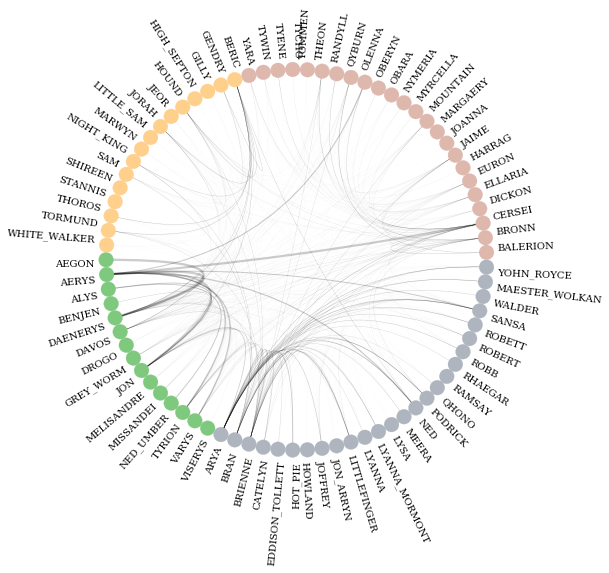

In [0]:
cmt = community.best_partition(g, weight='Weight')
nodes['cmt'] = [v for c,v in cmt.items()]
g = make_graph(nodes, edges)

c = nxv.CircosPlot(g, node_color='cmt', node_grouping='cmt',
                   node_labels=True, node_label_layout='rotation',
                   edge_width=(edges['Weight'] / edges['Weight'].quantile(0.98)).tolist(),
                   figsize=(8,8))
c.draw()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


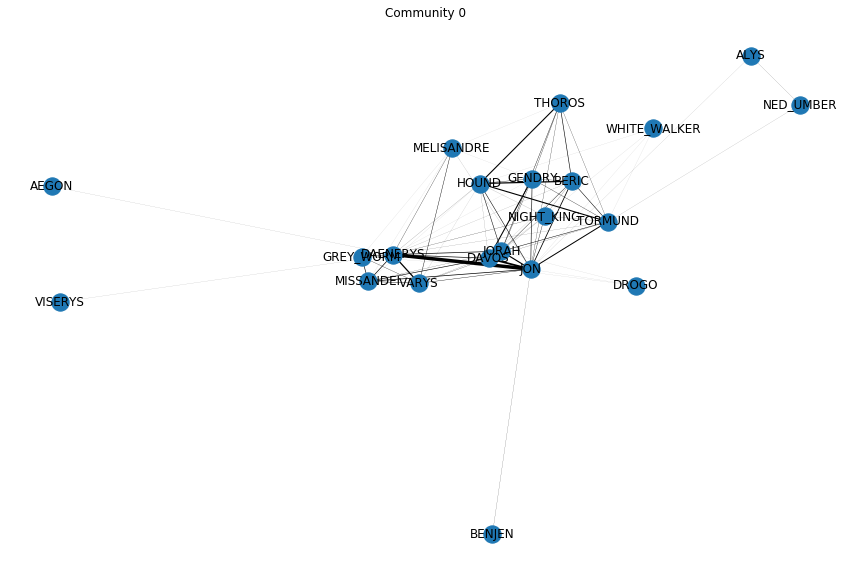

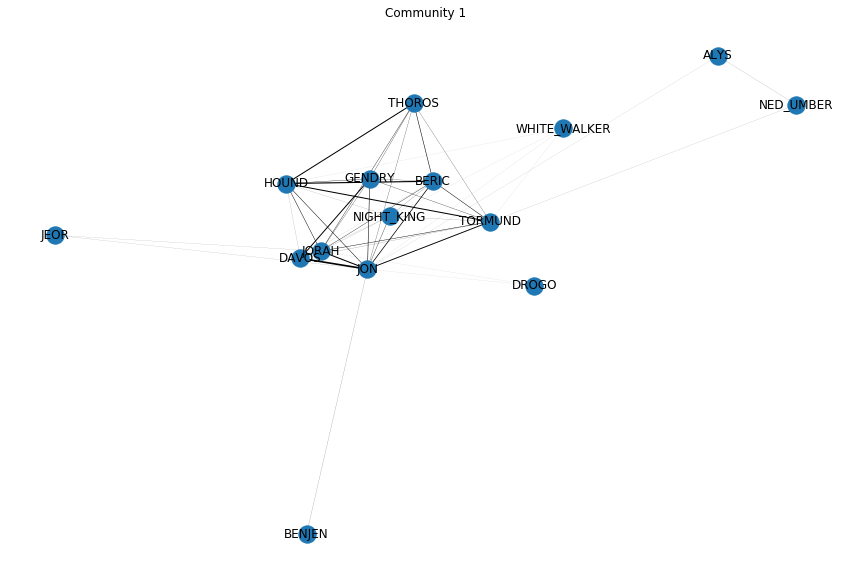

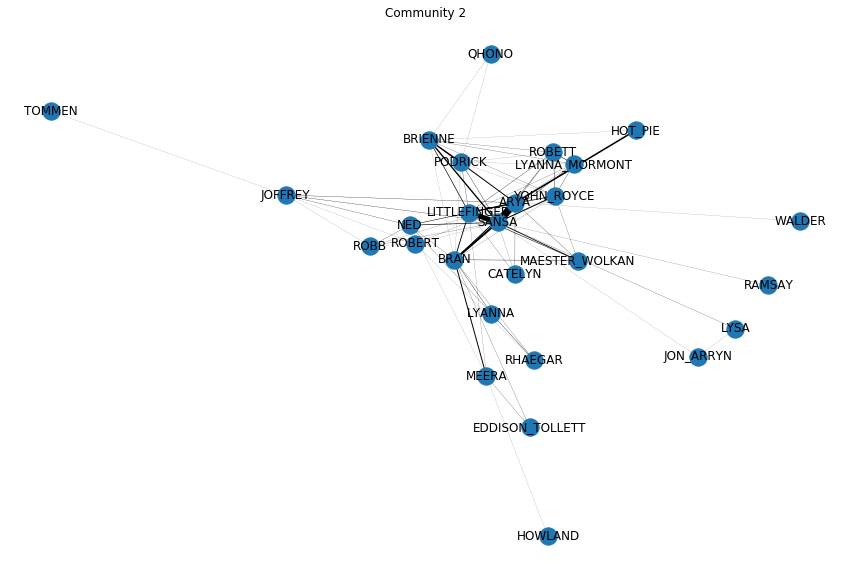

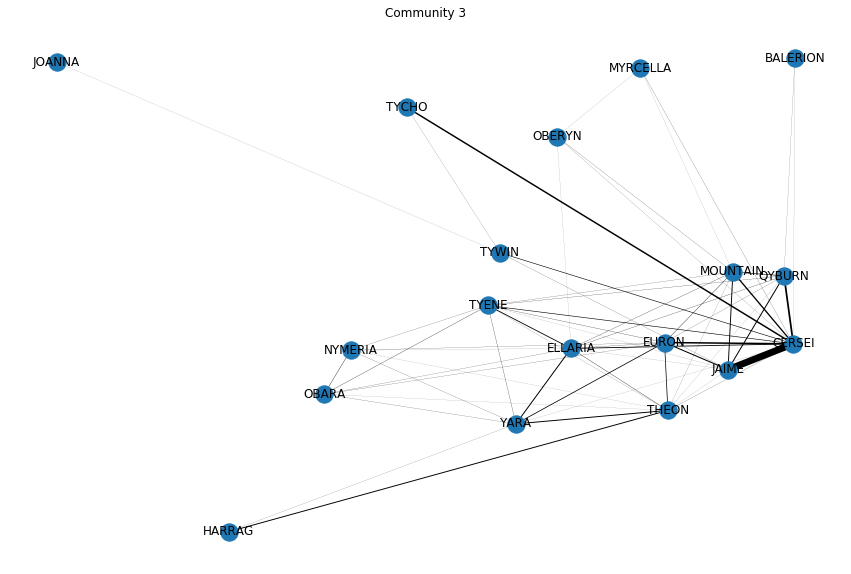

In [0]:
pos = nx.spring_layout(g)  # compute graph layout
for cmt_num in np.unique([v for c,v in cmt.items()]):
    partition = community.best_partition(g)

    nodelist = []
    # one community against the others
    for node, c in partition.items():
        if c == cmt_num:
            nodelist.append(node)
        else:
            partition[node] = -1  # put all the other communities in one communitiy
    
    sg = g.subgraph(nodelist)
    edge_widths = [sg.edges[e]['Weight'] for e in sg.edges]
    edge_widths = [w/np.quantile(edge_widths, 0.9) for w in edge_widths]
    
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sg, pos, with_labels=True, width=edge_widths)
    ax.set_title(f'Community {cmt_num}');

Graph Partitioning using min-cut method to determine which all characters are in the same faction.